In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
from pandas_datareader import data, wb
import pandas_datareader.data as web

In [5]:
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [8]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [9]:
end

datetime.datetime(2019, 2, 9, 21, 23, 43, 939629)

In [10]:
start

datetime.datetime(2018, 2, 9, 0, 0)

In [11]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, 'yahoo', start, end)

In [12]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,189.541275,185.701155,187.598526,187.652750,3.390370e+07,185.865405
std,22.334496,22.155682,22.260884,22.231894,1.429031e+07,22.120372
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.582779
25%,173.930000,169.700005,171.709999,171.260002,2.373465e+07,169.848694
50%,187.399994,184.940002,186.289993,186.050003,3.169350e+07,184.223236
75%,209.375000,205.784996,207.320000,207.760002,4.049140e+07,205.900421
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,230.275482


In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-02-09 to 2019-02-08
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


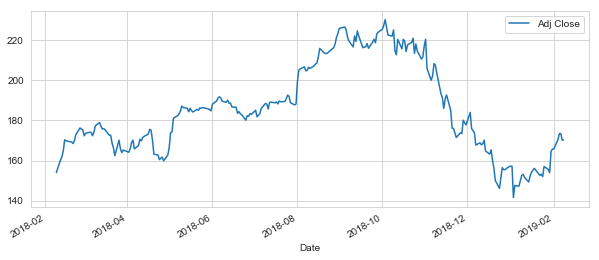

In [14]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

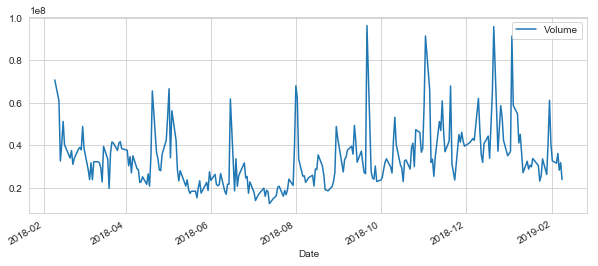

In [15]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [16]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

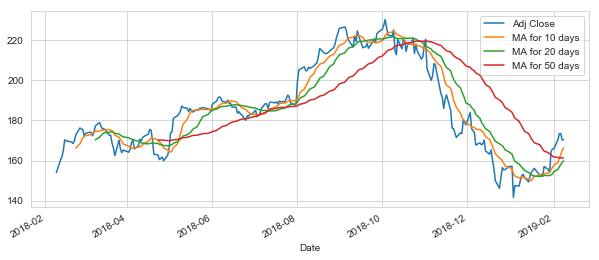

In [17]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

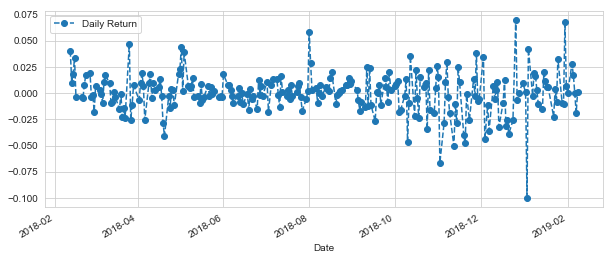

In [18]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True,linestyle='--',marker='o')
#AAPL['Daily Return'].plot(figsize=(10,4), legend=True,linestyle='--',marker='')


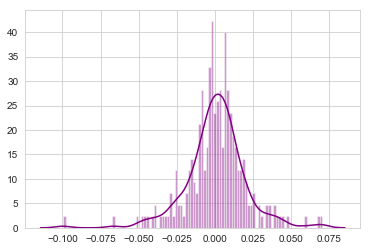

In [19]:
sns.distplot(tuple(AAPL['Daily Return'].dropna()),bins = 100,color='purple')

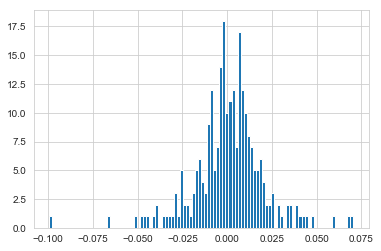

In [20]:
AAPL['Daily Return'].hist(bins=100)

In [21]:
closing_df = web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [22]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-02-09,154.064056,1339.599976,1037.780029,86.679474
2018-02-12,160.269562,1386.229980,1051.939941,87.613297
2018-02-13,161.875107,1414.510010,1052.099976,88.301384
2018-02-14,164.859650,1451.050049,1069.699951,89.684029
2018-02-15,170.395370,1461.760010,1089.520020,91.511101


In [23]:
tech_rets = closing_df.pct_change()

In [24]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-02-09,NaN,NaN,NaN,NaN
2018-02-12,0.040279,0.034809,0.013644,0.010773
2018-02-13,0.010018,0.020401,0.000152,0.007854
2018-02-14,0.018437,0.025832,0.016728,0.015658
2018-02-15,0.033578,0.007381,0.018529,0.020372


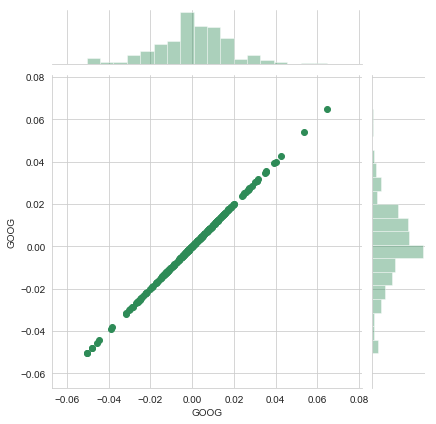

In [25]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

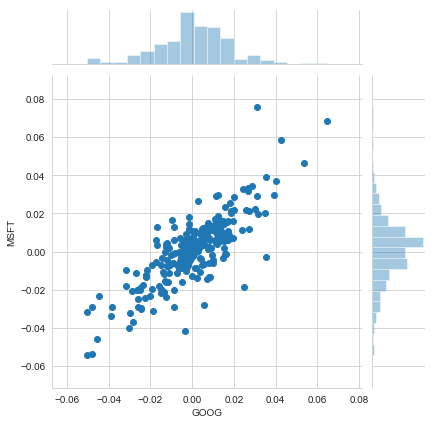

In [26]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

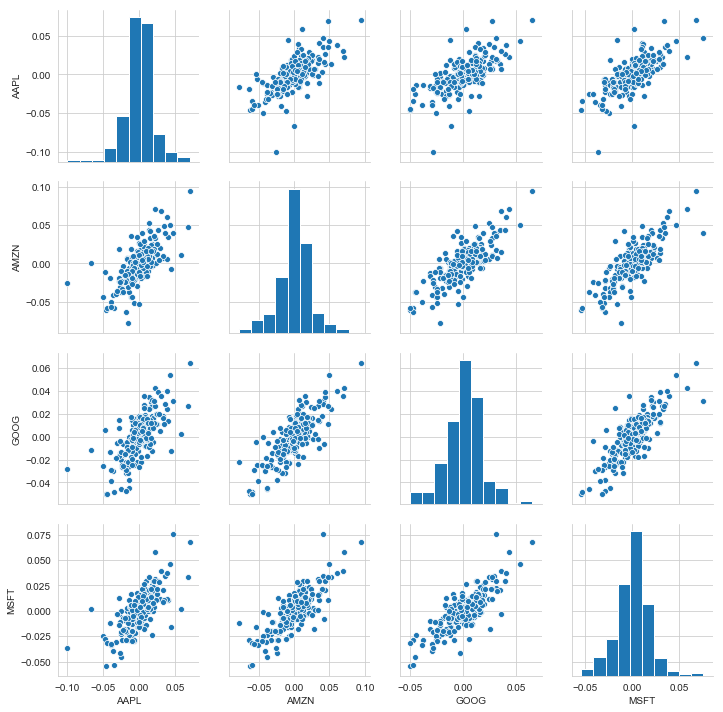

In [27]:
sns.pairplot(tech_rets.dropna())

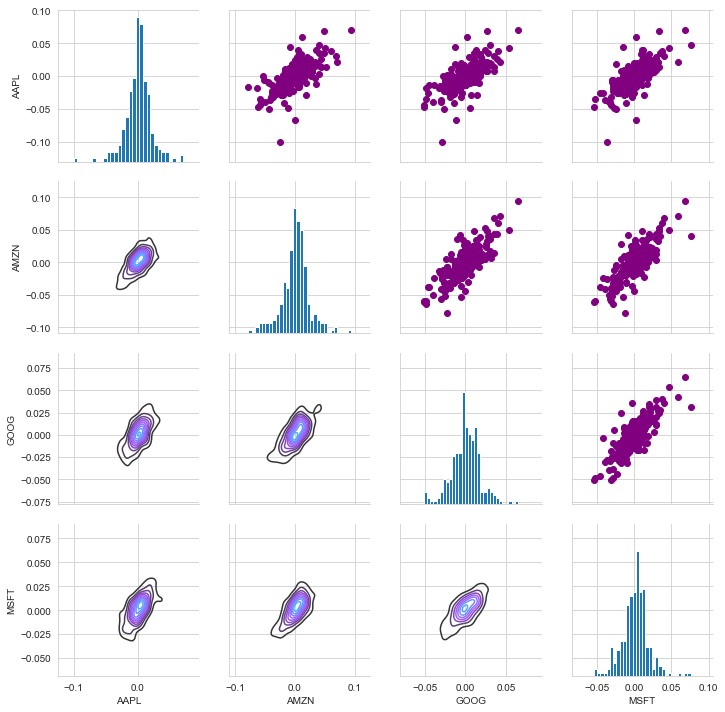

In [28]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

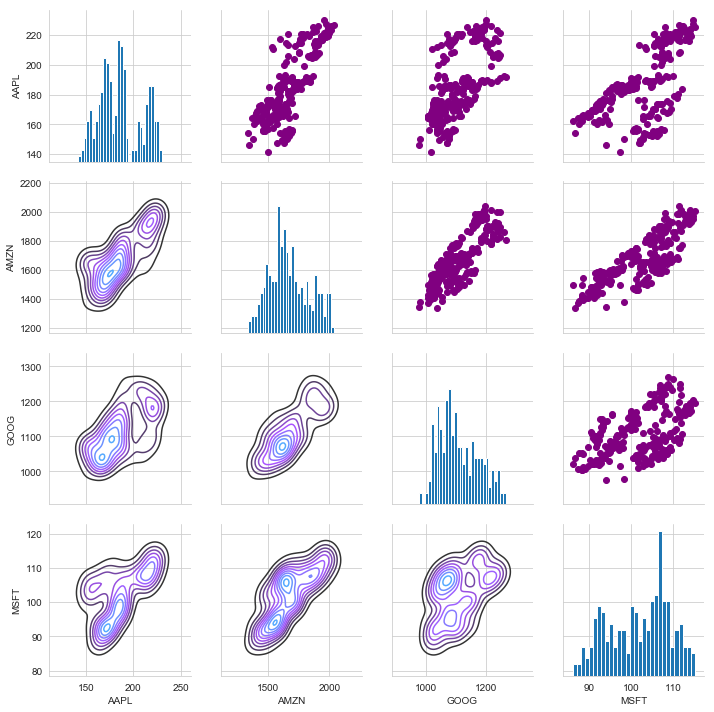

In [29]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [39]:
tech_rets_old = tech_rets

In [59]:
tech_rets = tech_rets[["AAPL","AMZN","GOOG","MSFT"]]

In [50]:
tech_rets = tech_rets.reset_index()

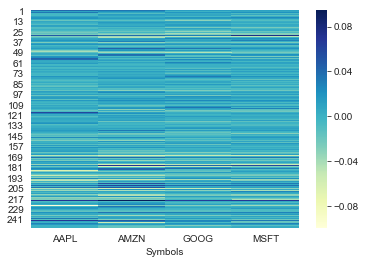

In [62]:
sns.heatmap(tech_rets.dropna(),cmap="YlGnBu")

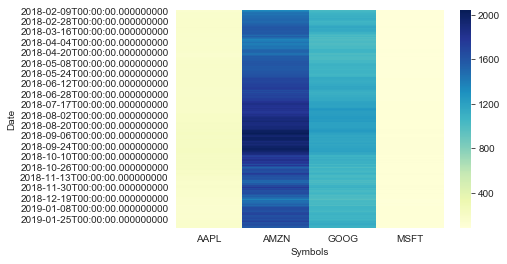

In [63]:
sns.heatmap(closing_df.dropna(),cmap="YlGnBu")